<a href="https://colab.research.google.com/github/rinivarg/ReproRehab2024-Pod3/blob/main/Materials/Week%206/Week%206%20-%20Codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Week 6**: Codebooks & Cloud Computing
* Imagine this: you are traveling ✈ all you have is your data on Dropbox, Google Drive or your flashdrive. And you have the 🏨 hotel's business center. What do you do? Hmmm...

* Sometimes, you need extra flexibility of running your code from any computer, even those that don't have all your software (R studio) on it. <br>

* This codebook is a Jupyter Notebook and you are using Google's cloud services to run R code in it. Note: some advanced usage instances require Google's subscription services. You can similarly run Python code if you went into the 'Runtime' option above and select 'Change Runtime.' <br>

* This also makes it easy to share code that is interactable and executable by anybody.

## Clear the Workspace & Load Libraries
Note that not all packages are available on the cloud, so you might need to install some packages within an instance. Any data or package you call will only be available in that session. Once you close out the session you will lose these packages or data. So you will need to re-load them each time.

In [1]:
suppressMessages(install.packages("emmeans"))
suppressMessages(install.packages("broom"))

In [3]:
rm(list = ls())

ReqdLibs = c("ggplot2","dplyr","emmeans","broom")
invisible(suppressMessages(lapply(ReqdLibs, library, character.only = TRUE)))


## Set theme for a figure

In [8]:
thm = theme(
          plot.title = element_text(colour = "black",size = 35, face = "bold", hjust = 0.5),
          legend.text = element_text(size = 18),
          legend.title = element_text(size = 20),
          axis.ticks.length = unit(0.3,"cm"),
          axis.line = element_line(colour = "black",linewidth = 1),
          axis.ticks = element_line(colour = "black",linewidth = 1),
          axis.text = element_text(colour = "black",size = 35),
          axis.text.x = element_text(lineheight = 1.1, margin = margin(t = 20)),
          axis.title.x = element_text(size=35, colour = "grey35", face = "plain",
                                     lineheight = 1.1, margin = margin(r = 10)),
          axis.title.y = element_text(size=35, colour = "grey35", face = "plain",
                                     lineheight = 1.1, margin = margin(r = 10)))



## Let's load a built-in R dataset


In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


## Use DPLYR functions to manipulate your data as needed

In [ ]:
diamonds %>%
  filter(cut!="Fair") %>%
  select(clarity,cut, depth) %>%
  {.->>diamonds.ideal}

head(diamonds.ideal)

clarity,cut,depth
<ord>,<ord>,<dbl>
SI2,Ideal,61.5
SI1,Premium,59.8
VS1,Good,56.9
VS2,Premium,62.4
SI2,Good,63.3
VVS2,Very Good,62.8


## Plot the in-built data

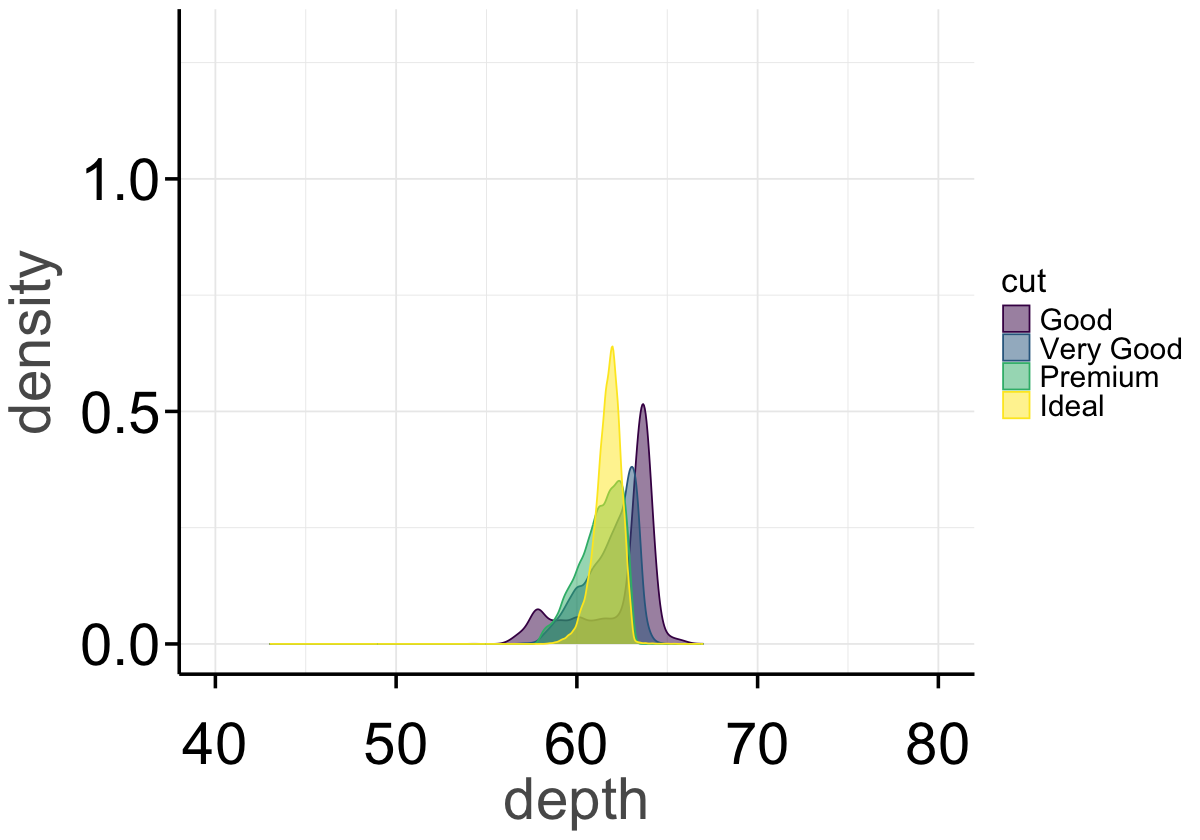

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(diamonds.ideal, mapping = aes(x = depth, y = after_stat(density),
                                     group = cut, col = cut, fill = cut)) +
  # geom_histogram(bins = 50, fill = NA) +
  geom_density(alpha = 0.5) +
  # facet_wrap(~clarity) +
  coord_cartesian(xlim = c(40,80), ylim = c(0, 1.3)) +
    theme_minimal() + thm


## How to load your own dataset?
Use the options bar on the left to upload data file in the temporary session.



In [6]:
dat.calc2 = read.csv("calcData.csv", header = TRUE)
head(dat.calc2)

,Sub,cond,incline,speed,R,VT,VE,VO2,age,reported_weight_kg,reported_length_cm,gender,level_slow,level_walk,weight_from_force_plates_kg,adjVO2,W,W_rest,W_adj,C_meas
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sub1,walk,downhill,0.8,0.9019424,0.7859465,20.33910,728.5032,26,86,185,M,885.5529,891.5307,90.57511,8.470967,2.920638,1.362433,1.558204,1.947756
2,Sub1,walk,downhill,1.3,0.8661119,0.8409442,25.83893,1005.2468,26,86,185,M,885.5529,891.5307,90.57511,11.688916,3.998645,1.362433,2.636212,2.027855
3,Sub1,walk,level,1.3,0.8340541,1.0104406,32.61279,1368.0726,26,86,185,M,885.5529,891.5307,90.57511,15.907821,5.403549,1.362433,4.041116,3.108550
4,Sub1,walk,uphill,0.8,0.8661413,1.2505480,40.73454,1687.3811,26,86,185,M,885.5529,891.5307,90.57511,19.620710,6.712065,1.362433,5.349632,6.687040
5,Sub1,walk,uphill,1.3,0.8315770,1.4630620,58.84244,2540.5691,26,86,185,M,885.5529,891.5307,90.57511,29.541501,10.029119,1.362433,8.666686,6.666682
6,Sub1,walk,level,0.8,0.8727268,1.0036957,26.00091,992.9288,26,86,185,M,885.5529,891.5307,90.57511,11.545684,3.955388,1.362433,2.592955,3.241194


## Plot your own data!

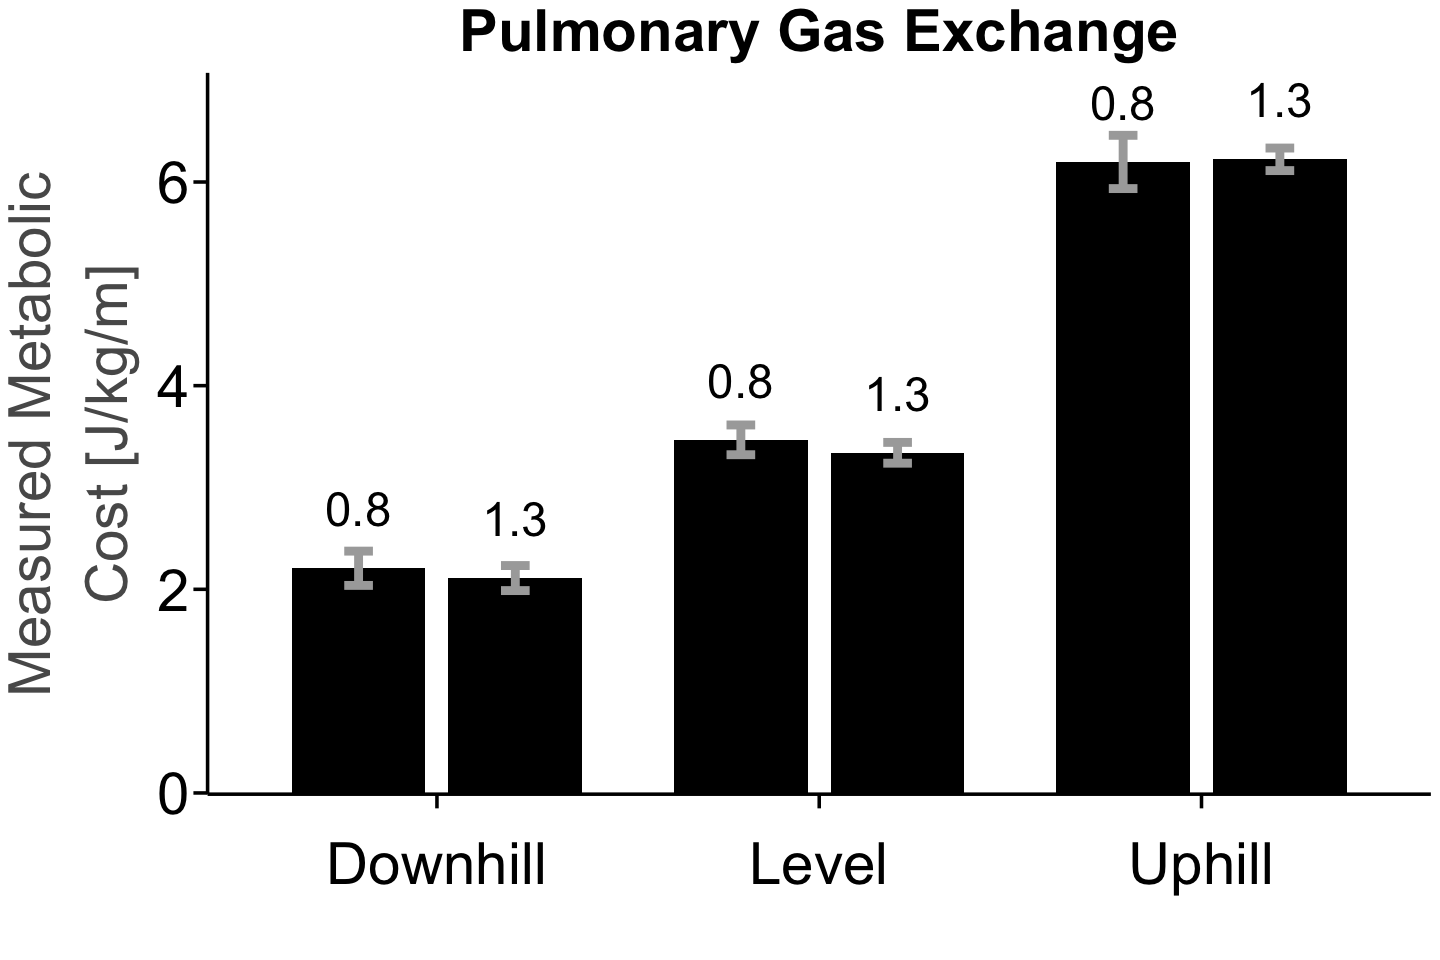

In [9]:
options(repr.plot.width = 12, repr.plot.height = 8)

repro.fig =
# FUNCTION CALL
ggplot(dat.calc2, aes(x = incline,y = C_meas, group = speed, label = speed)) +

# LAYERS THAT SUMMARIZE WHILE PLOTTING! - this is one of the most powerful features of ggplot
stat_summary(geom = "bar", fun = mean, col = NA, fill = "black", width = 0.7, na.rm = TRUE,
             position=position_dodge(width = 0.82, preserve = 'single')) +
stat_summary(geom = "errorbar",fun.data = mean_se, width = 0.15, lwd=2.5, col="darkgray", na.rm = TRUE,
            position=position_dodge(0.82, preserve = 'single')) +
stat_summary(geom = "text", fun = mean, position = position_dodge(0.82, preserve = 'total'), na.rm = TRUE,
             vjust = -1.25, size = 10) +

# AXIS LIMITS
coord_cartesian(ylim = c(0.31,6.75)) +

# LABELS
scale_x_discrete(labels = c("Downhill", "Level", "Uphill")) +  # capitalize label initials :/
labs(title = "Pulmonary Gas Exchange", x = "", y = "Measured Metabolic\nCost [J/kg/m]") +
theme_classic() + thm

repro.fig

## Run some statistics
In this case, we'll compare:<br>

1.   across the 3 inclines for each level of speed
2.   between the 2 speeds for each level of incline


In [23]:
mod.inter = lm(data = dat.calc2, W_adj ~ incline*speed)
# summary(mod.inter)

# below functions tidy and glance from the broom package allow you to view 
# model outputs as tibbles, although they are not publication ready
tidy(mod.inter)
glance(mod.inter)
emm_inter = emmeans(mod.inter, ~incline|speed)
pairs(emm_inter, by = "incline") %>% tidy

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.20006678,0.4675560,0.42789907,6.701390e-01
inclinelevel,0.06448867,0.6571845,0.09812873,9.221321e-01
inclineuphill,-0.25379433,0.6571845,-0.38618431,7.006214e-01
speed,1.95654666,0.4374894,4.47221515,3.179998e-05
inclinelevel:speed,1.18061479,0.6119414,1.92929375,5.806193e-02
inclineuphill:speed,4.30761814,0.6119414,7.03926535,1.478566e-09


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.945088,0.940864,0.5240353,223.7425,1.486843e-39,5,-51.73032,117.4606,133.2994,17.84985,65,71


incline,term,contrast,null.value,estimate,std.error,df,statistic,p.value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
downhill,speed,speed0.8 - speed1.3,0,-0.9782733,0.2187447,65,-4.472215,3.179998e-05
level,speed,speed0.8 - speed1.3,0,-1.5685807,0.2139365,65,-7.331991,4.482607e-10
uphill,speed,speed0.8 - speed1.3,0,-3.1320824,0.2139365,65,-14.640241,2.950599e-22


That's all! Happy coding and sharing your code with the world! ☘

# The End
---